# Loading The Required Librariries

Using libraries:

- Numpy for Mathematical Computations
- Pandas for storing data
- Pytorch for creating the network model
- Matplotlib for visualisation
- Pickle for opening and reading files

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torch
from torch.autograd import Variable
import torch.nn.functional as NN
from torch import nn
import pandas as pd
import pickle

# Getting Hands on Data
Reading and storing the data

In [0]:
#storing the data in A and B
with open('train_image.pkl','rb') as trn:
  A = pickle.load(trn)

with open('train_label.pkl','rb') as tst:
  B = pickle.load(tst)
  
#Converting the list data to numpy arrays
A = np.array(A)
B = np.array(B)

#Visualising the data

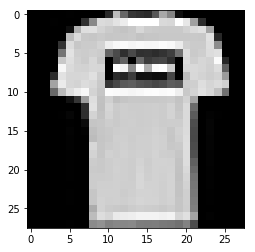

In [3]:
#Displaying the image

img = A[0,:].reshape(28,28)
plt.grid(False)
plt.imshow(img,cmap = "gray")

In [4]:
#Getting information about the data
print(np.unique(B,return_counts = True))

(array([0, 2, 3, 6]), array([2000, 2000, 2000, 2000]))


#Altering the data according to the need

In [5]:
#Changing the labels
B[B == 2] = 1
B[B == 3] = 2
B[B == 6] = 3

print(A.shape)
print(B.shape)

(8000, 784)
(8000,)


In [6]:
#Shuffling the data
data = np.concatenate((A,B[:,None]) , axis = 1)
df = pd.DataFrame(data)
df = df.sample(frac = 1).reset_index(drop = True)
data = df.values
data[:100,-1]

array([3, 0, 3, 1, 1, 3, 1, 3, 0, 2, 2, 3, 2, 0, 3, 2, 0, 1, 1, 2, 2, 2,
       3, 3, 3, 1, 0, 2, 3, 2, 0, 1, 0, 0, 3, 1, 3, 3, 1, 0, 2, 0, 2, 1,
       1, 1, 2, 0, 2, 3, 1, 2, 0, 1, 3, 3, 3, 1, 1, 2, 3, 1, 3, 1, 1, 3,
       1, 2, 2, 2, 0, 0, 0, 3, 2, 0, 0, 3, 0, 0, 1, 1, 3, 2, 3, 0, 0, 3,
       1, 2, 0, 3, 2, 1, 1, 0, 0, 0, 0, 0])

#Dividing the data into training and tesing

In [7]:
A_train = data[:7000,:784] / 255.0
B_train = data[:7000,-1]

A_val = data[7000:,:784] / 255.0
B_val = data[7000:,-1]

print(A_train.shape, B_train.shape)

(7000, 784) (7000,)


#Building The Neural Network

In [0]:
class Net(torch.nn.Module):
    def __init__(self,n_feature,hidden_1,hidden_2,hidden_3,hidden_4,n_output):
        super(Net,self).__init__()
        self.hidden_1 = torch.nn.Linear(n_feature,hidden_1)
        self.hidden_2 = torch.nn.Linear(hidden_1,hidden_2)
        self.hidden_3 = torch.nn.Linear(hidden_2,hidden_3)
        self.hidden_4 = torch.nn.Linear(hidden_3,hidden_4)
        self.n_output = torch.nn.Linear(hidden_4,n_output)
        
    def forward(self,x):
        x = NN.relu(self.hidden_1(x))
        x = NN.relu(self.hidden_2(x))
        x = NN.relu(self.hidden_3(x))
        x = NN.relu(self.hidden_4(x))
        x = NN.log_softmax(self.n_output(x))
        return x

784 -> 500 -> 250 -> 100 -> 16 -> 4

In [9]:
net = Net(n_feature = 784, hidden_1 = 500, hidden_2 = 250, hidden_3 = 100, hidden_4 = 16, n_output = 4)
print(net)

loss_func = torch.nn.CrossEntropyLoss()
opt=torch.optim.Adam(net.parameters(),lr=0.001)

Net(
  (hidden_1): Linear(in_features=784, out_features=500, bias=True)
  (hidden_2): Linear(in_features=500, out_features=250, bias=True)
  (hidden_3): Linear(in_features=250, out_features=100, bias=True)
  (hidden_4): Linear(in_features=100, out_features=16, bias=True)
  (n_output): Linear(in_features=16, out_features=4, bias=True)
)


#Conversion to Tensors

In [0]:
A1 = torch.tensor(A_train).type(torch.FloatTensor)
B1 = torch.tensor(B_train).type(torch.FloatTensor)

A_train = Variable(A1, requires_grad=True).type(torch.FloatTensor)
B_train = Variable(B1, requires_grad=False).type(torch.LongTensor)

#Training the Model

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


tensor(1.3965, grad_fn=<NllLossBackward>)
tensor(1.3827, grad_fn=<NllLossBackward>)
tensor(1.3650, grad_fn=<NllLossBackward>)
tensor(1.3430, grad_fn=<NllLossBackward>)
tensor(1.3137, grad_fn=<NllLossBackward>)
tensor(1.2765, grad_fn=<NllLossBackward>)
tensor(1.2337, grad_fn=<NllLossBackward>)
tensor(1.1822, grad_fn=<NllLossBackward>)
tensor(1.1275, grad_fn=<NllLossBackward>)
tensor(1.0726, grad_fn=<NllLossBackward>)
tensor(1.0202, grad_fn=<NllLossBackward>)
tensor(0.9679, grad_fn=<NllLossBackward>)
tensor(0.9177, grad_fn=<NllLossBackward>)
tensor(0.8674, grad_fn=<NllLossBackward>)
tensor(0.8201, grad_fn=<NllLossBackward>)
tensor(0.7817, grad_fn=<NllLossBackward>)
tensor(0.7491, grad_fn=<NllLossBackward>)
tensor(0.7227, grad_fn=<NllLossBackward>)
tensor(0.7056, grad_fn=<NllLossBackward>)
tensor(0.6952, grad_fn=<NllLossBackward>)
tensor(0.6866, grad_fn=<NllLossBackward>)
tensor(0.6783, grad_fn=<NllLossBackward>)
tensor(0.6747, grad_fn=<NllLossBackward>)
tensor(0.6615, grad_fn=<NllLossBac

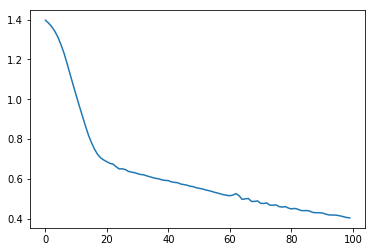

In [11]:
error = []

for ix in range(100):
    
    out = net(A_train)
    loss = loss_func(out,B_train)
    
    opt.zero_grad()
    loss.backward()
    opt.step()
    
    error.append(loss)
    print(loss)
    
plt.plot(error[:])

#Conversion of Validaton Data

In [12]:
A_val = torch.Tensor(A_val)
A_val = Variable(A_val, requires_grad = True).type(torch.FloatTensor)

out_val = net(A_val)

#Choosig the one with highest probability
out_final = out_val.data.numpy().argmax(axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


#Printing The Accuracy

In [13]:
acc = ((out_final == B_val).sum()/ (A_val.shape[0])) * 100
print(acc)

82.5


#Working with the Test data

In [0]:
with open('test_image.pkl','rb') as tst:
  test = pickle.load(tst)

type(test)

#Converting to Array
test_set = np.array(test)

In [0]:
test_datas = test_set[:,:] / 255.0

#Converting to Tensor
test_datas = torch.Tensor(test_datas)
test_datas = Variable(test_datas, requires_grad = True).type(torch.FloatTensor)

#Storing the final results

In [16]:
output_test = net(test_datas)
output_final = output_test.data.numpy().argmax(axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


In [0]:
for ix in range(2000):
  if output_final[ix] == 1:
    output_final[ix] = 2
    
  elif output_final[ix] == 2:
    output_final[ix] = 3
    
  elif output_final[ix] == 3:
    output_final[ix] = 6

In [18]:
print(np.unique(output_final,return_counts = True))

print(output_final[:1000])

(array([0, 2, 3, 6]), array([504, 532, 523, 441]))
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 6 0 0 0 0 0 0 0 6 0 0
 6 0 0 6 0 0 0 0 0 6 2 0 0 0 0 0 0 0 0 0 0 0 0 3 3 0 0 3 0 0 0 0 0 0 0 0 0
 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 6 0 0 0 0 0 0 2 0 0 2 0 0
 0 0 0 3 3 6 0 0 0 0 6 0 0 3 6 3 0 0 0 0 6 0 0 0 6 0 0 6 0 0 0 3 0 0 0 0 0
 0 0 6 0 6 3 0 0 0 0 0 0 3 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 6 0 6 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 3 0 0 0 0 0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6 0 0 6 0 0 6 0 0 0 0
 0 0 0 0 0 2 6 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 6 0 6 6 0 2 3 0 0 0 2
 0 0 0 0 0 3 0 0 0 0 6 0 0 0 0 0 0 2 0 0 0 0 0 3 0 0 6 6 0 0 0 0 0 0 0 0 0
 0 0 0 0 6 0 6 0 0 0 0 0 0 6 6 0 0 6 0 6 0 0 0 0 3 6 0 0 0 0 0 0 0 0 6 0 0
 0 0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 6 0 0 0 6 6 2 6 0 0 0
 0 0 0 2 0 0 0 0 0 6 0 0 0 0 0 0 0 0 2 0 0 0 0 6 6 0 0 6 0 6 0 3 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0 

#Saving the result in the respective .csv file

In [0]:
pd.DataFrame(output_final).to_csv('./Priyam_Garg.csv',header = True, index = False)